<a href="https://colab.research.google.com/github/ayobanjo/Smart-contract-project/blob/main/Correlation_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Carrying out frequency and correlation analysis

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_excel('compiled_risk_data cleaned.xlsx')  # Adjust the path

# Display the first few rows
df.head()

**Calculating Correlation**

In [ ]:


import numpy as np
import pandas as pd
from scipy import stats

# Function to calculate the Phi coefficient for two binary variables
def phi_coefficient(x, y):
    contingency_table = pd.crosstab(x, y)
    chi2, _, _, _ = stats.chi2_contingency(contingency_table, correction=False)
    n = np.sum(contingency_table.values)
    phi = np.sqrt(chi2 / n)
    return phi

# Function to create a Phi correlation matrix for only Boolean columns in a DataFrame
def phi_correlation_matrix(df):
    # Select only columns that are either of type 'bool' or are binary integers (0 or 1)
    bool_df = df.loc[:, df.apply(lambda col: col.dropna().isin([0, 1]).all())]

    # Get the column names
    cols = bool_df.columns
    n = len(cols)

    # Initialize an empty matrix to store Phi coefficients
    phi_matrix = np.zeros((n, n))

    # Iterate over all pairs of columns to calculate Phi coefficient
    for i in range(n):
        for j in range(i, n):
            if i == j:
                phi_matrix[i, j] = 1  # Diagonal elements are always 1 (correlation with itself)
            else:
                phi_value = phi_coefficient(bool_df.iloc[:, i], bool_df.iloc[:, j])
                phi_matrix[i, j] = phi_value
                phi_matrix[j, i] = phi_value  # The matrix is symmetric

    # Convert the matrix into a DataFrame for better readability
    phi_df = pd.DataFrame(phi_matrix, index=cols, columns=cols)
    return phi_df

# Example usage
# Assuming 'df' is your DataFrame with several columns, including some binary/boolean columns

# Generate the Phi correlation matrix for only the Boolean columns
phi_matrix = phi_correlation_matrix(df)

# Print the Phi correlation matrix
phi_matrix.to_excel('phi_correlation_matrix.xlsx')
phi_matrix




,Is_closed_source,hidden_owner,anti_whale_modifiable,Is_anti_whale,Is_honeypot,buy_tax,sell_tax,slippage_modifiable,Is_blacklisted,can_take_back_ownership,...,centralized_risk_medium,centralized_risk_high,centralized_risk_low,event_setter,external_dependencies,immutable_states,reentrancy_without_eth_transfer,incorrect_inheritance_order,shadowing_local,events_maths
Is_closed_source,1.000000,0.369707,0.343690,0.315030,0.395213,0.321702,0.387056,0.395185,0.338289,0.271407,...,0.155005,0.217522,0.222421,0.362247,0.133487,0.275804,0.250871,0.345926,0.369769,0.306771
hidden_owner,0.369707,1.000000,0.371478,0.355905,0.327921,0.454088,0.421995,0.418722,0.299374,0.372806,...,0.204905,0.332508,0.207183,0.304709,0.130765,0.227950,0.264086,0.338342,0.299703,0.192539
anti_whale_modifiable,0.343690,0.371478,1.000000,0.535935,0.443638,0.460189,0.523431,0.625384,0.338538,0.339862,...,0.231735,0.346325,0.180772,0.376646,0.186075,0.300448,0.310437,0.369030,0.411102,0.304929
Is_anti_whale,0.315030,0.355905,0.535935,1.000000,0.371162,0.501289,0.513076,0.506928,0.342199,0.281594,...,0.219838,0.294149,0.199763,0.338353,0.171500,0.383366,0.275920,0.351970,0.385557,0.298309
Is_honeypot,0.395213,0.327921,0.443638,0.371162,1.000000,0.386395,0.414252,0.389505,0.478584,0.287333,...,0.191870,0.224409,0.275755,0.369108,0.213049,0.387233,0.321094,0.459741,0.440468,0.360933
buy_tax,0.321702,0.454088,0.460189,0.501289,0.386395,1.000000,0.710421,0.444450,0.339349,0.325880,...,0.239542,0.291915,0.220048,0.290769,0.158356,0.359222,0.256810,0.356881,0.387091,0.292743
sell_tax,0.387056,0.421995,0.523431,0.513076,0.414252,0.710421,1.000000,0.465559,0.381838,0.272054,...,0.291278,0.310623,0.232080,0.330944,0.180567,0.353964,0.339176,0.331051,0.428375,0.297044
slippage_modifiable,0.395185,0.418722,0.625384,0.506928,0.389505,0.444450,0.465559,1.000000,0.285535,0.362478,...,0.237516,0.329146,0.244272,0.386549,0.207663,0.314914,0.347986,0.349939,0.415810,0.329925
Is_blacklisted,0.338289,0.299374,0.338538,0.342199,0.478584,0.339349,0.381838,0.285535,1.000000,0.243977,...,0.157359,0.333676,0.177963,0.362220,0.186101,0.297033,0.262961,0.381248,0.431951,0.298247
can_take_back_ownership,0.271407,0.372806,0.339862,0.281594,0.287333,0.325880,0.272054,0.362478,0.243977,1.000000,...,0.243507,0.362326,0.216989,0.294450,0.136959,0.303278,0.224612,0.358143,0.311711,0.243687


**Visualize Correlation using Heatmap**

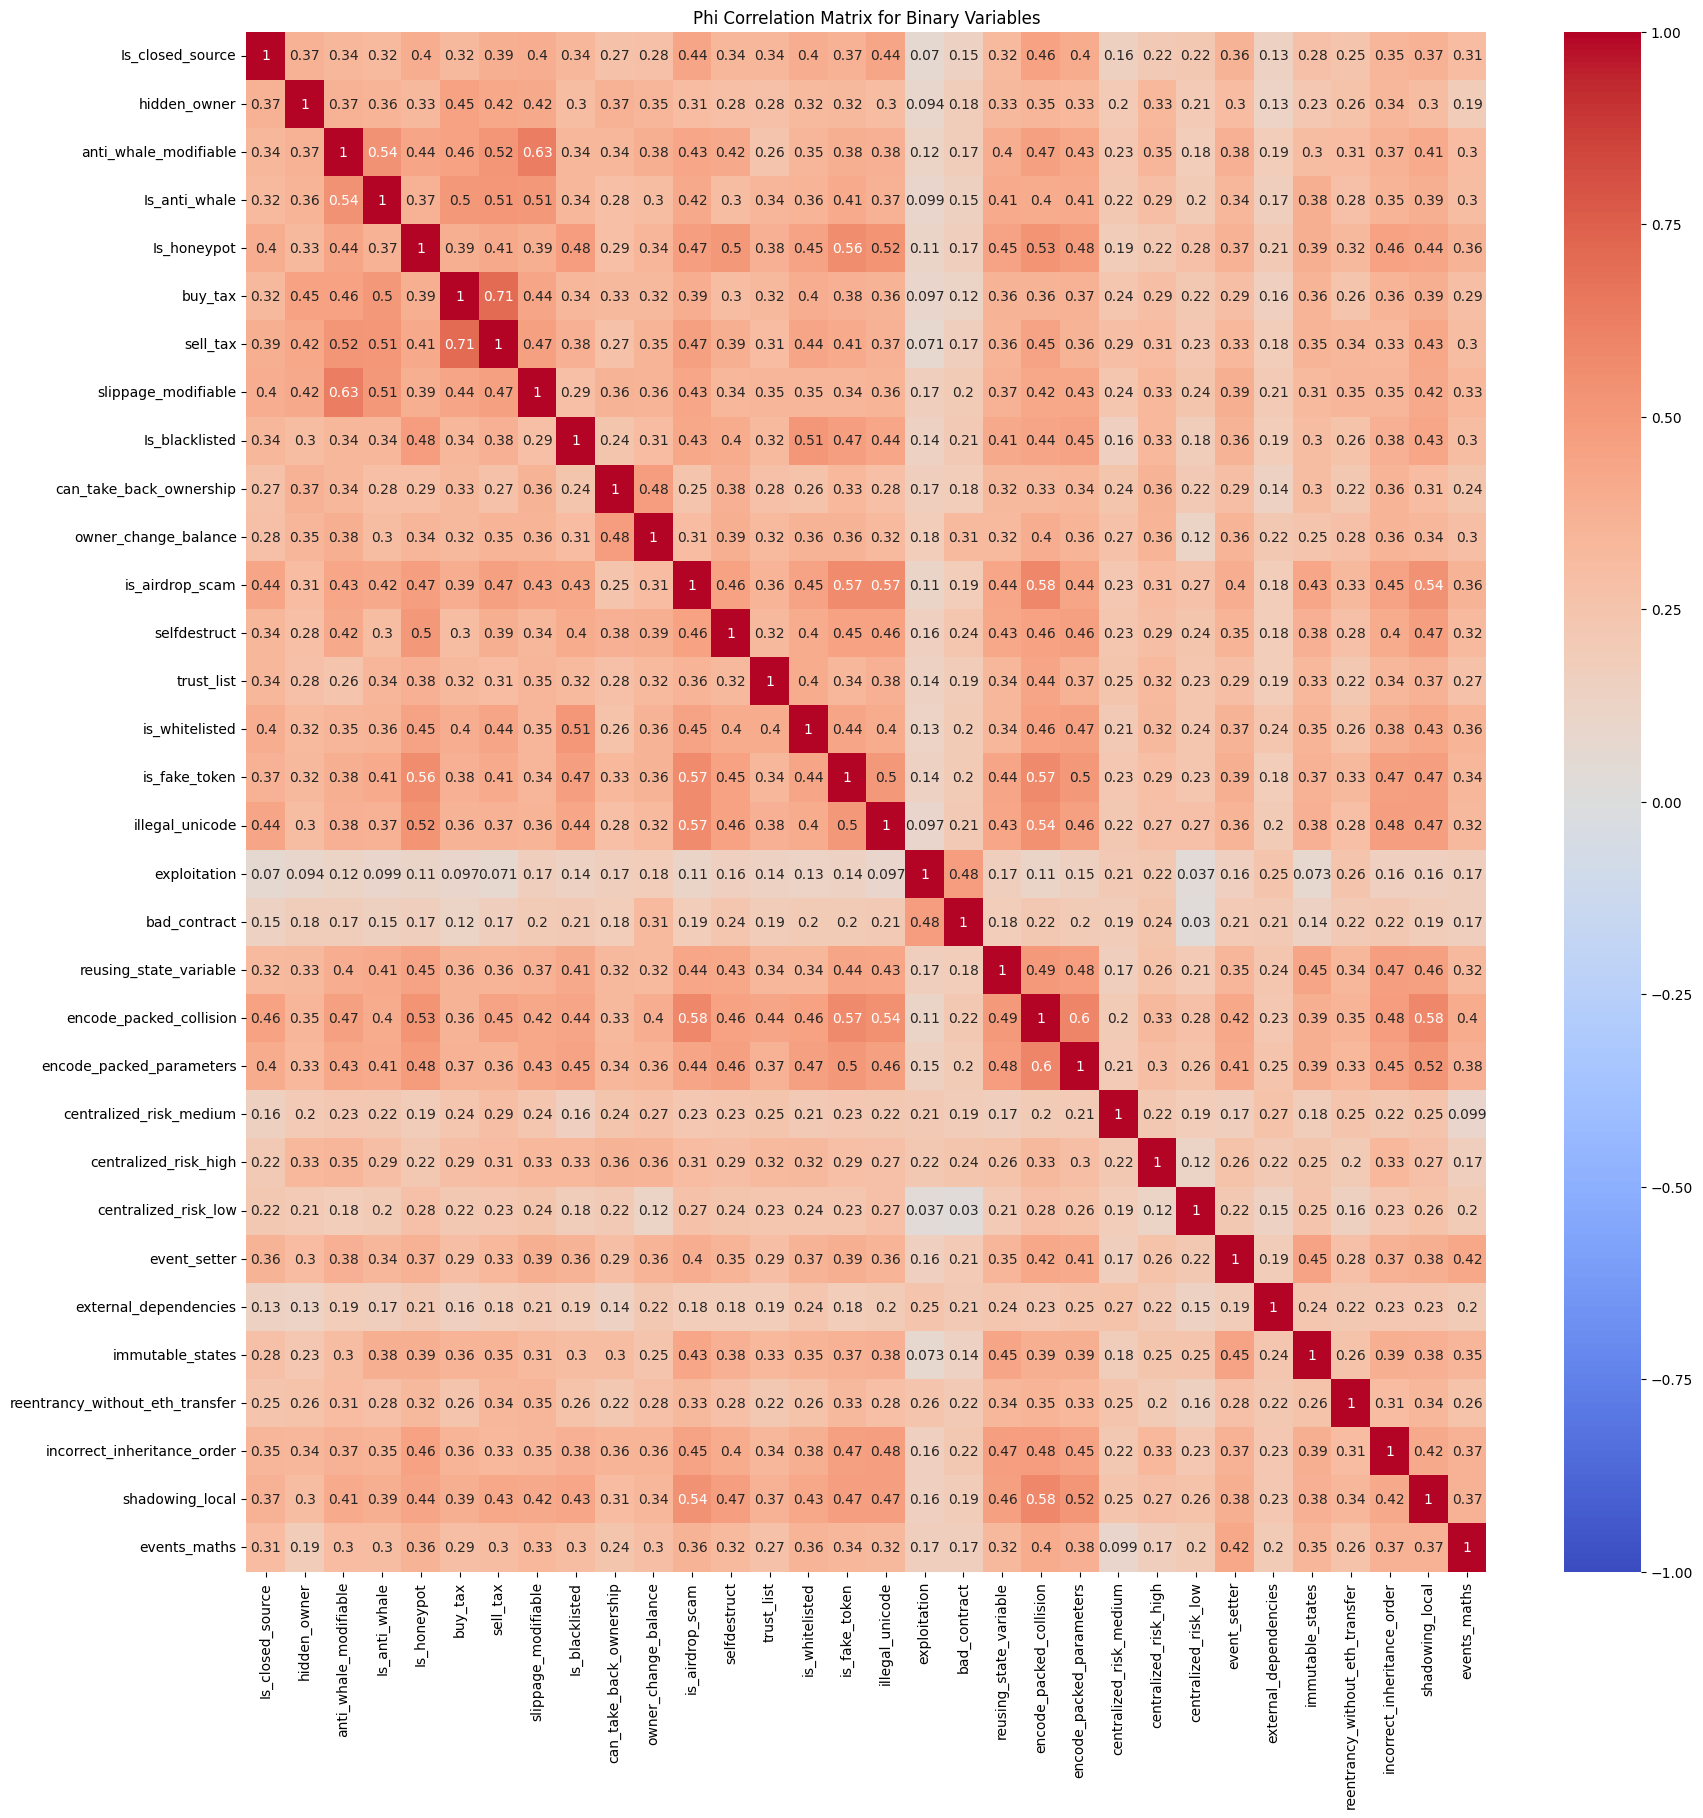

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(phi_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Phi Correlation Matrix for Binary Variables")
plt.show()

For reduced columns and rows

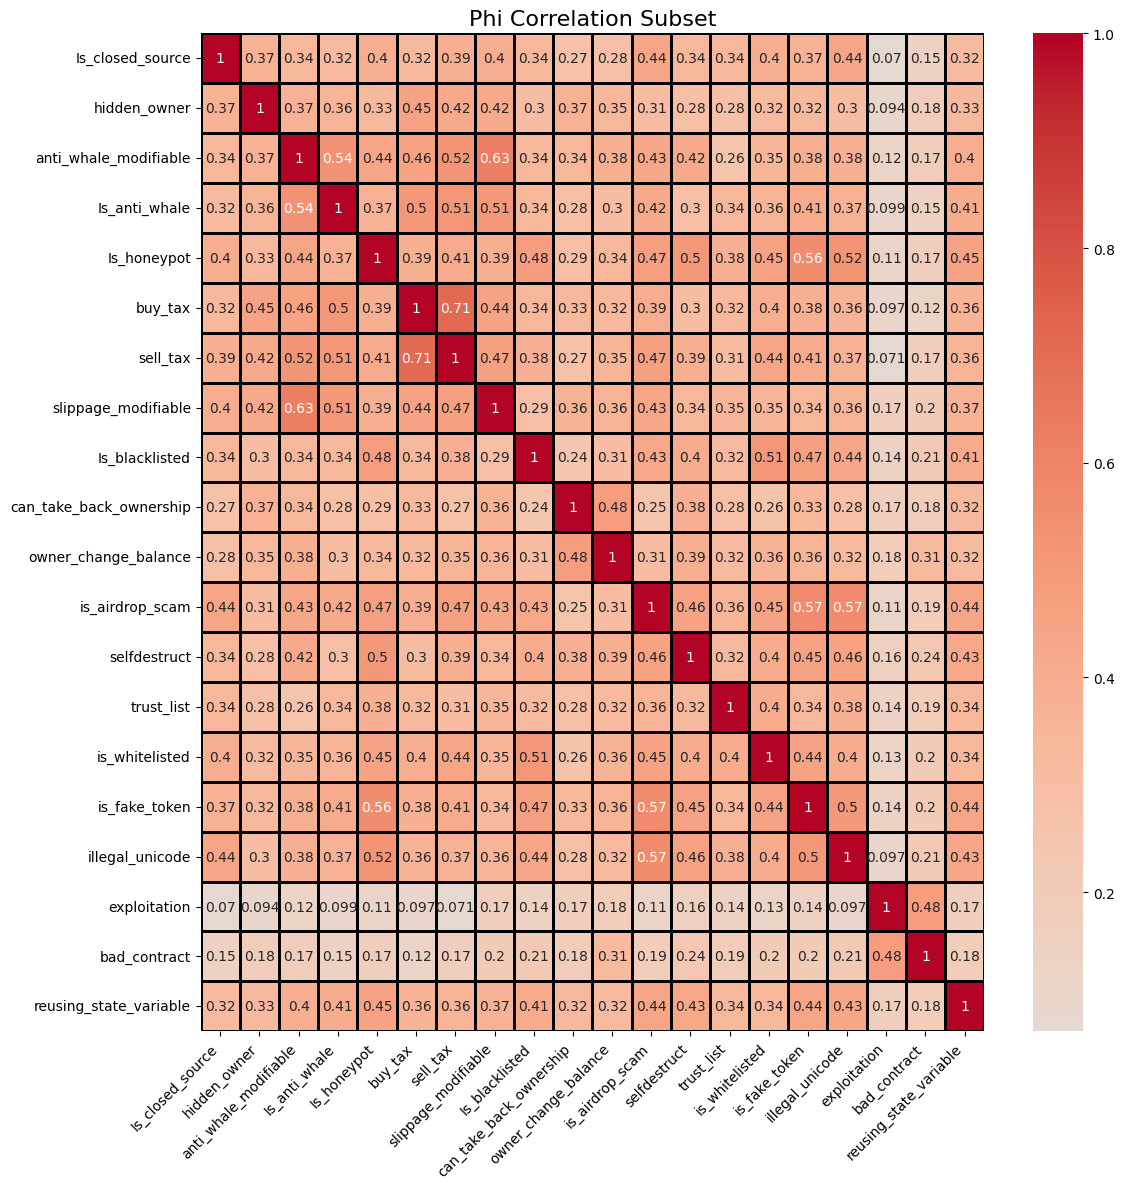

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select a subset of columns and rows from the phi_matrix
selected_columns = ['Is_closed_source', 'hidden_owner', 'anti_whale_modifiable',
       'Is_anti_whale', 'Is_honeypot', 'buy_tax', 'sell_tax',
       'slippage_modifiable', 'Is_blacklisted', 'can_take_back_ownership',
       'owner_change_balance', 'is_airdrop_scam', 'selfdestruct', 'trust_list',
       'is_whitelisted', 'is_fake_token', 'illegal_unicode', 'exploitation',
       'bad_contract', 'reusing_state_variable']
phi_subset = phi_matrix.loc[selected_columns, selected_columns]  # Subset rows and columns

# Plot the heatmap for the selected subset
plt.figure(figsize=(12, 12))  # Adjust figure size accordingly
sns.heatmap(phi_subset, annot=True, cmap='coolwarm', center=0, linewidths=1, linecolor='black')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title('Phi Correlation Subset', fontsize=16)
plt.tight_layout()
plt.show()
